In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt  
import sklearn.model_selection as skm
from sklearn.metrics import (accuracy_score,
                             log_loss)

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)

In [2]:
#load the datasets into a pandas DataFrame
df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)

/tmp/ipykernel_70/4246522230.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)


In [3]:
#size of the the dataset
print("Student data:", df.shape)
#data types of all columns
print(df.dtypes)

Student data: (70692, 212)
id_geral            object
cd_escola          float64
nm_uf_bl            object
matriculas         float64
docentes           float64
                    ...   
dumm_rp_33p_fup    float32
dumm_rp_34p_fup    float32
dumm_rp_36p_fup    float32
dumm_rp_37p_fup    float32
dumm_rp_41p_fup    float32
Length: 212, dtype: object


In [4]:
df = df.rename(columns={
    'female' : 'Student is female (Baseline)',
    'miss_f_coded' : 'Student gender could not be coded based on name (Baseline)',
    'dumm_rp_08_bl' : 'Education of mother: At least some secondary (Baseline)',
    'dumm_rp_09_bl' : 'Education of father: At least some secondary (Baseline)',
    'dumm_rp_14_bl' : 'Student\'s Family receives Bolsa Familia cash transfer (Baseline)',
    'dumm_rp_23_bl' : 'Student has computer with internet at home (Baseline)',
    'dumm_rp_24_bl' : 'Student has failed at least one school year (Baseline)',
    'dumm_rp_49_bl' : 'Student is not working at the moment (Baseline)',
    'business_bl' : 'Student works in own or family business (Baseline)',
    'employee_bl' : 'Student works as employee or other (Baseline)',
    'dumm_rp_50_bl' : 'Student receives income (Baseline)',
    'dumm_rp_53B_bl' : 'Student part of income saved is non-zero (Baseline)',
    'dumm_rp_55_bl' : 'Student has borrowed money (any source) (Baseline)',
    'dumm_rp_56_bl' : 'Student is behind on payments (unconditional) (Baseline)',
    'dumm_rp_57s_bl' : 'Student is behind on payments to store (Baseline)',
    'dumm_rp_57i_bl' : 'Student is behind on payments to family friends or other people (Baseline)',
    'dumm_rp_57f_bl' : 'Student is behind on payments to bank or FI (Baseline)',
    'dumm_rp_59_bl' : 'Student says they are a saver (Baseline)',
    'dumm_rp_61_bl' : 'Student has formal savings (Baseline)',
    'dumm_rp_64A_bl' : 'Student makes a list of all monthly expenses (Baseline)',
    'dumm_rp_65A_bl': 'Student saves money for future purchases (Baseline)',
    'dumm_rp88__92C_bl': 'Student has bought electronics shoes or clothing with credit card (Baseline)',
    'dumm_rp88__92D_bl': 'Student has bought electronics shoes or clothing on installments (Baseline)',
    'dumm_rp88__92AB_bl': 'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
    'dumm_negotiates_bl': 'Student negotiates prices or payment methods (Baseline)',
    'dumm_search_bl': 'Student comparison shops before making purchase (Baseline)',
    'dumm_rp_08p_bl': 'Parent has at least some secondary education (Baseline)',
    'p_employee_bl': 'Parent is an employee (Baseline)',
    'p_selfempl_bl': 'Parent is self-employeed (Baseline)',
    'p_other_bl': 'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)',
    'dumm_rp_14p_bl': 'Parent: makes a list of all monthly expenses (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has checking account (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has savings account (Baseline)',
    'dumm_rp_19p_bl': 'Parent: has debit card (Baseline)',
    'dumm_rp_23p_bl': 'Parent: has checks (Baseline)',
    'dumm_formal_saving_bl':' Parent: has formal savings (Baseline)',
    'dumm_rp_33p_bl': 'Parent: Student talks to you about finances (Baseline)',
    'dumm_rp_34p_bl': 'Parent: Student helps organize HH budget (Baseline)',
    'dumm_rp_36p_bl': 'Parent: Prefers R50K plus 15 percent interest (Baseline)',
    'dumm_rp_37p_bl': 'Parent: Inflation question dummy for correct (Baseline)',
    'vl_proficiencia_bl': 'Student: Finanical Proficieny Score (Baseline)', 
    'dumm_rp_49_fup' : "Student is not working at the moment" ,  
    'business_fup' : 'Student works in own or family busines' ,
    'employee_fup' : 'Student works as employee or other', 
    'dumm_rp_50_fup': 'Student: Receives income' ,
     'dumm_rp_53B_fup': 'Student: Pct of income saved is non-zero', 
    'dumm_rp_55_fup': 'Student: Has borrowed money (any source)',
    'dumm_rp_56_fup' : 'Student: Is behind on payments (unconditional)',
    'dumm_rp_57f_fup' : 'Student: Is behind on payments to bank or FI' ,
    'dumm_rp_57s_fup' : 'Student: Is behind on payments to store',
    'dumm_rp_57i_fup': 'Student: Is behind on payments to family friends or other people', 
    'dumm_rp_59_fup' : 'Student: Says they are a saver' , 
    'dumm_rp_61_fup' : 'Student: Has formal savings', 
    'dumm_rp_64A_fup' : 'I make a list of all monthly expenses', 
    'dumm_rp_65A_fup' : 'Student: Saves money for future purchases',
    'dumm_rp_88C_fup': 'Student: I have bought cell phone with credit card', 
    'dumm_rp_88D_fup': 'Student: I have bought cell phone on installments',
    'dumm_rp_88AB_fup': 'Student: I have bought a cell phone with cash/debit card',
    'dumm_rp_89C_fup': 'Student: I have bought computer with credit card' ,
    'dumm_rp_89D_fup': 'Student: I have bought computer on installments' ,
    'dumm_rp_89AB_fup': 'Student: I have bought a computer with cash/debit card' ,
    'dumm_rp_90C_fup': 'Student: I have bought an electronic device with credit card' ,
    'dumm_rp_90D_fup': 'Student: I have bought an electronic device on installments' ,
    'dumm_rp_90AB_fup': 'Student: I have bought an electronic device with cash/debit card' ,
    'dumm_rp_91C_fup': 'Student: I have bought shoes with credit card' ,
    'dumm_rp_91D_fup': 'Student: I have bought shoes on installments' ,
    'dumm_rp_91AB_fup': 'Student: I have bought shoes with cash/debit card',
    'dumm_rp_92C_fup': 'Student: I have bought clothing with credit card', 
    'dumm_rp_92D_fup': 'Student: I have bought clothing on installments' ,
    'dumm_rp_92AB_fup' : 'Student: I have bought clothing with cash/debit card',
    'dumm_rp88__92C_fup': 'I have bought electronics shoes or clothing with credit card',
    'dumm_rp88__92D_fup': 'I have bought electronics shoes or clothing on installments' ,
    'dumm_rp88__92AB_fup': 'I have bought electronics shoes or clothing with cash/debit card' ,
    'dumm_rp_93_fup': 'I negotiate the price' ,
    'dumm_rp_94_fup': 'Student I search price in different stores',
    'dumm_rp_95_fup': 'Student I negotiate the payment method' ,
    'dumm_rp_96_fup': 'Student: I search similar models/brands' ,
    'dumm_negotiates_fup': 'Student Negotiates prices or payment methods' ,
    'dumm_search_fup': 'Student Comparison shops before making purchase' ,
    'dumm_rp_08p_fup': 'Parent has at least some secondary education' ,
    'p_employee_fup': 'Parent is an employee' ,
    'p_selfempl_fup': 'Student Parent is self-employeed',
    'p_other_fup': 'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'dumm_rp_14p_fup': 'Parent: makes a list of all monthly expenses',
    'dumm_rp_18p_fup' : 'Parent: has checking account', 
    'dumm_rp_19p_fup': 'Parent: savings account', 
    'dumm_rp_21p_fup': 'Parent has debit card' ,
    'dumm_rp_23p_fup': 'Parent has checks' ,
    'dumm_formal_saving_fup': 'Parent has formal savings',
    'dumm_rp_33p_fup': 'Parent: Student talks to you about finances' ,
    'dumm_rp_34p_fup': 'Parent: student helps organize HH budget',
    'dumm_rp_36p_fup' : 'Parent: prefers R50K plus 15 percent interest (follow up)',
    'dumm_rp_37p_fup' : 'Parent: Inflation question dummy for correct  (follow up)', 
    'dumm_rp_41p_fup' : 'Parent: budget must have income and expenses (follow up)',

})
column_names = df.columns.tolist()
print(column_names)

['id_geral', 'cd_escola', 'nm_uf_bl', 'matriculas', 'docentes', 'abandonona1sriemdio', 'aprovaona1sriemdio', 'treatment', 'pair_all', 'treatment_workshop', 'strata', 'round', 'female_coded', 'rp_01_bl', 'rp_08_bl', 'rp_09_bl', 'rp_14_bl', 'rp_23_bl', 'rp_24_bl', 'Student: Finanical Proficieny Score (Baseline)', 'bl_test', 'rp_49_bl', 'rp_50_bl', 'rp_53_bl', 'rp_55_bl', 'rp_56_bl', 'rp_57_bl', 'rp_59_bl', 'rp_61_bl', 'rp_64_bl', 'rp_65_bl', 'rp_88_bl', 'rp_89_bl', 'rp_90_bl', 'rp_91_bl', 'rp_92_bl', 'rp_93_bl', 'rp_94_bl', 'rp_95_bl', 'rp_96_bl', 'bl_aluno', 'rp_08p_bl', 'rp_09p_bl', 'rp_14p_bl', 'rp_18p_bl', 'rp_19p_bl', 'rp_21p_bl', 'rp_23p_bl', 'rp_33p_bl', 'rp_34p_bl', 'rp_36p_bl', 'rp_37p_bl', 'vl_proficiencia_fup', 'fu1_test', 'rp_55_fup', 'rp_57_fup', 'rp_49_fup', 'rp_50_fup', 'rp_53_fup', 'rp_56_fup', 'rp_59_fup', 'rp_61_fup', 'rp_64_fup', 'rp_65_fup', 'rp_88_fup', 'rp_89_fup', 'rp_90_fup', 'rp_91_fup', 'rp_92_fup', 'rp_93_fup', 'rp_94_fup', 'rp_95_fup', 'rp_96_fup', 'fu1_aluno'

In [5]:
#useful subdata sets 
follow_up_1_df = df[df['round'] == 0]
follow_up_2_df = df[df['round'] == 1]
follow_up_2_df.shape

(35346, 212)

In [6]:
baseline_counts = follow_up_1_df['Student has bought electronics shoes or clothing with credit card (Baseline)'].value_counts()
print(baseline_counts)
baseline_proportions = baseline_counts / baseline_counts.sum()
print(baseline_proportions)

Student has bought electronics shoes or clothing with credit card (Baseline)
0.0    18345
1.0     6201
Name: count, dtype: int64
Student has bought electronics shoes or clothing with credit card (Baseline)
0.0    0.747372
1.0    0.252628
Name: count, dtype: float64


In [7]:
18345+6201

24546

In [8]:
baseline_counts = follow_up_1_df['I have bought electronics shoes or clothing with credit card'].value_counts()
print(baseline_counts)
baseline_proportions = baseline_counts / baseline_counts.sum()
print(baseline_proportions)

I have bought electronics shoes or clothing with credit card
0.0    12280
1.0     4058
Name: count, dtype: int64
I have bought electronics shoes or clothing with credit card
0.0    0.751622
1.0    0.248378
Name: count, dtype: float64


In [9]:
12280+4058

16338

In [10]:
baseline_counts = follow_up_2_df['I have bought electronics shoes or clothing with credit card'].value_counts()
print(baseline_counts)
baseline_proportions = baseline_counts / baseline_counts.sum()
print(baseline_proportions)

I have bought electronics shoes or clothing with credit card
0.0    12658
1.0     5117
Name: count, dtype: int64
I have bought electronics shoes or clothing with credit card
0.0    0.712124
1.0    0.287876
Name: count, dtype: float64


In [11]:
12658+ 5117

17775

In [12]:
baseline_counts = follow_up_1_df['treatment'].value_counts()
print(baseline_counts)
baseline_proportions = baseline_counts / baseline_counts.sum()
print(baseline_proportions)

treatment
0.0    17757
1.0    17561
Name: count, dtype: int64
treatment
0.0    0.502775
1.0    0.497225
Name: count, dtype: float64


In [13]:
 17757+17561

35318

In [14]:
baseline_counts = follow_up_2_df['treatment'].value_counts()
print(baseline_counts)
baseline_proportions = baseline_counts / baseline_counts.sum()
print(baseline_proportions)

treatment
0.0    17757
1.0    17561
Name: count, dtype: int64
treatment
0.0    0.502775
1.0    0.497225
Name: count, dtype: float64


In [20]:
#Students present in the baseline survey
print(follow_up_2_df['bl_aluno'].value_counts(dropna=False))

bl_aluno
1.0    25171
NaN    10175
Name: count, dtype: int64


In [21]:
#Students present in follow up survey 1 
print(follow_up_1_df['fu1_aluno'].value_counts(dropna=False))


fu1_aluno
NaN    18454
1.0    16892
Name: count, dtype: int64


In [22]:
#Students present in follow up survey 2
print(follow_up_2_df['fu2_aluno'].value_counts(dropna=False))

fu2_aluno
1.0    18230
NaN    17116
Name: count, dtype: int64


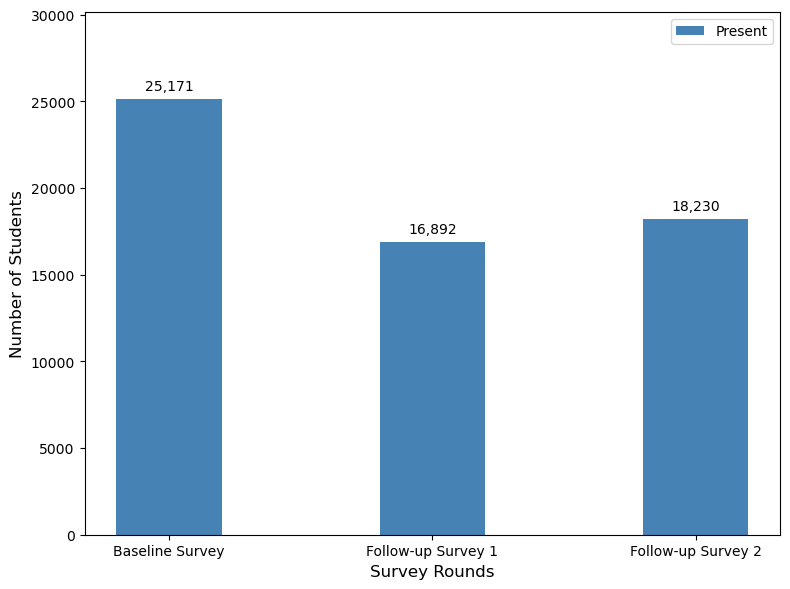

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the survey rounds
categories = ['Baseline Survey', 'Follow-up Survey 1', 'Follow-up Survey 2']
present = [25171, 16892, 18230]

# Plotting
x = np.arange(len(categories))  # label locations
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(8, 6))

# Bars for students present
g1 = ax.bar(x, present, width, label='Present', color='steelblue')

# Adding labels, title, and legend
ax.set_ylabel('Number of Students', fontsize=12)
ax.set_xlabel('Survey Rounds', fontsize=12)
#ax.set_title('Student Participation in Surveys', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(fontsize=10)

# Adding data labels to bars
for bar in g1:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + 300,  # Slightly above the bar with adjusted spacing
        f'{height:,}', ha='center', va='bottom', fontsize=10
    )

# Adjusting y-axis limits to reduce blank space
ax.set_ylim(0, max(present) + 5000)

# Adjust layout
plt.tight_layout()
plt.show()


